In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

# Set the random seed for reproducibility
np.random.seed(42)

In [3]:
# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, 
                           n_redundant=10, n_clusters_per_class=1, 
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

# Checking the balance of the dataset
unique, counts = np.unique(y, return_counts=True)
print(f"Class distribution before balancing: {dict(zip(unique, counts))}")

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Class distribution before balancing: {0: 900, 1: 100}


In [4]:
# Logistic Regression with balanced class weights
model = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       276
           1       0.77      0.83      0.80        24

    accuracy                           0.97       300
   macro avg       0.88      0.91      0.89       300
weighted avg       0.97      0.97      0.97       300

Confusion Matrix:
 [[270   6]
 [  4  20]]


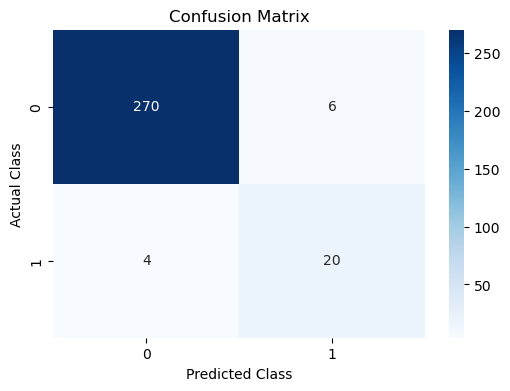

In [5]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

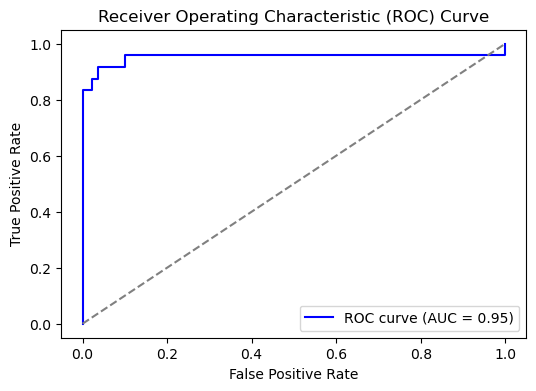

In [6]:
# Compute the ROC curve and AUC for the positive class
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Class distribution after SMOTE: {0: 624, 1: 624}
Classification Report (SMOTE):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       276
           1       0.83      0.83      0.83        24

    accuracy                           0.97       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.97      0.97      0.97       300



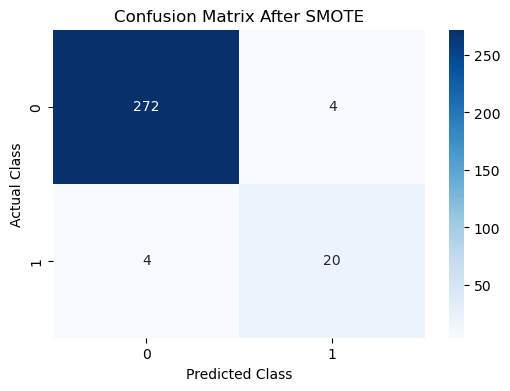

In [7]:
# Using SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check new class distribution
unique, counts = np.unique(y_train_smote, return_counts=True)
print(f"Class distribution after SMOTE: {dict(zip(unique, counts))}")

# Retrain the model on SMOTE data
model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# Predict and evaluate on the original test set
y_pred_smote = model_smote.predict(X_test)
print("Classification Report (SMOTE):\n", classification_report(y_test, y_pred_smote))

# Confusion matrix after SMOTE
cm_smote = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix After SMOTE')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()